[tutorial](https://docs.xarray.dev/en/stable/user-guide/data-structures.html)
    

In [ ]:
##Data structures in user guide
##Or, find or use fake data that is in the shape of data you'll actually use and figure out how to make it an xarray dataset

In [1]:
import numpy as np
import pandas as pd
import xarray as xr

import matplotlib.pyplot as plt
from IPython.display import display, Markdown, Latex

import seaborn as sns

%matplotlib inline

In [2]:
data = np.random.rand(4, 3)
locs = ["IA", "IL", "IN"]
times = pd.date_range("2000-01-01", periods=4)
foo = xr.DataArray(data, coords=[times, locs], dims=["time", "space"])
foo

<xarray.DataArray (time: 4, space: 3)>
array([[0.08652303, 0.06695373, 0.32431037],
       [0.71320147, 0.37881983, 0.00505686],
       [0.69422334, 0.43739584, 0.63358955],
       [0.31494075, 0.69582201, 0.43087964]])
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 2000-01-03 2000-01-04
  * space    (space) <U2 'IA' 'IL' 'IN'

In [3]:
xr.DataArray(data)

<xarray.DataArray (dim_0: 4, dim_1: 3)>
array([[0.08652303, 0.06695373, 0.32431037],
       [0.71320147, 0.37881983, 0.00505686],
       [0.69422334, 0.43739584, 0.63358955],
       [0.31494075, 0.69582201, 0.43087964]])
Dimensions without coordinates: dim_0, dim_1

In [4]:
xr.DataArray(data, coords=[("time", times), ("space", locs)])

<xarray.DataArray (time: 4, space: 3)>
array([[0.08652303, 0.06695373, 0.32431037],
       [0.71320147, 0.37881983, 0.00505686],
       [0.69422334, 0.43739584, 0.63358955],
       [0.31494075, 0.69582201, 0.43087964]])
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 2000-01-03 2000-01-04
  * space    (space) <U2 'IA' 'IL' 'IN'

In [6]:
xr.DataArray(
            data,
            coords={
                "time": times,
                "space": locs,
                "const": 42,
                "ranking": ("space", [1, 2, 3]),
            },
            dims=["time", "space"],
        )

<xarray.DataArray (time: 4, space: 3)>
array([[0.08652303, 0.06695373, 0.32431037],
       [0.71320147, 0.37881983, 0.00505686],
       [0.69422334, 0.43739584, 0.63358955],
       [0.31494075, 0.69582201, 0.43087964]])
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 2000-01-03 2000-01-04
  * space    (space) <U2 'IA' 'IL' 'IN'
    const    int32 42
    ranking  (space) int32 1 2 3

In [7]:
xr.DataArray(
    data,
    coords={
        "time": times,
        "space": locs,
        "const": 42,
        "ranking": ("space", [1,2,3]),
    },
    dims=["time", "space"],
)

<xarray.DataArray (time: 4, space: 3)>
array([[0.08652303, 0.06695373, 0.32431037],
       [0.71320147, 0.37881983, 0.00505686],
       [0.69422334, 0.43739584, 0.63358955],
       [0.31494075, 0.69582201, 0.43087964]])
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 2000-01-03 2000-01-04
  * space    (space) <U2 'IA' 'IL' 'IN'
    const    int32 42
    ranking  (space) int32 1 2 3

In [9]:
xr.DataArray(
    data,
    coords={
        "time": times,
        "space": locs,
        "const": 42,
        "ranking": (("time", "space"), np.arange(12).reshape(4,3)),
    },
    dims=["time", "space"],
)

<xarray.DataArray (time: 4, space: 3)>
array([[0.08652303, 0.06695373, 0.32431037],
       [0.71320147, 0.37881983, 0.00505686],
       [0.69422334, 0.43739584, 0.63358955],
       [0.31494075, 0.69582201, 0.43087964]])
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 2000-01-03 2000-01-04
  * space    (space) <U2 'IA' 'IL' 'IN'
    const    int32 42
    ranking  (time, space) int32 0 1 2 3 4 5 6 7 8 9 10 11

In [11]:
df = pd.DataFrame({"x": [0, 1], "y": [2, 3]}, index=["a", "b"])
df.index.name = "abc"
df.columns.name = "xyz"
df

xyz,x,y
abc,,
a,0,2
b,1,3


In [12]:
xr.DataArray(df)

<xarray.DataArray (abc: 2, xyz: 2)>
array([[0, 2],
       [1, 3]], dtype=int64)
Coordinates:
  * abc      (abc) object 'a' 'b'
  * xyz      (xyz) object 'x' 'y'

## DataArray Properties

In [13]:
foo.values

array([[0.08652303, 0.06695373, 0.32431037],
       [0.71320147, 0.37881983, 0.00505686],
       [0.69422334, 0.43739584, 0.63358955],
       [0.31494075, 0.69582201, 0.43087964]])

In [14]:
foo.dims

('time', 'space')

In [15]:
foo.coords

Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 2000-01-03 2000-01-04
  * space    (space) <U2 'IA' 'IL' 'IN'

In [16]:
foo.attrs

{}

In [17]:
print(foo.name)

None


In [18]:
foo.values = 1.0 * foo.values

In [19]:
foo.name = "foo"
foo.attrs["units"] = "meters"
foo

<xarray.DataArray 'foo' (time: 4, space: 3)>
array([[0.08652303, 0.06695373, 0.32431037],
       [0.71320147, 0.37881983, 0.00505686],
       [0.69422334, 0.43739584, 0.63358955],
       [0.31494075, 0.69582201, 0.43087964]])
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 2000-01-03 2000-01-04
  * space    (space) <U2 'IA' 'IL' 'IN'
Attributes:
    units:    meters

In [20]:
foo.rename("bar")

<xarray.DataArray 'bar' (time: 4, space: 3)>
array([[0.08652303, 0.06695373, 0.32431037],
       [0.71320147, 0.37881983, 0.00505686],
       [0.69422334, 0.43739584, 0.63358955],
       [0.31494075, 0.69582201, 0.43087964]])
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 2000-01-03 2000-01-04
  * space    (space) <U2 'IA' 'IL' 'IN'
Attributes:
    units:    meters

## DataArray Coordinates

In [21]:
foo.coords["time"]

<xarray.DataArray 'time' (time: 4)>
array(['2000-01-01T00:00:00.000000000', '2000-01-02T00:00:00.000000000',
       '2000-01-03T00:00:00.000000000', '2000-01-04T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 2000-01-03 2000-01-04

In [22]:
foo["time"]

<xarray.DataArray 'time' (time: 4)>
array(['2000-01-01T00:00:00.000000000', '2000-01-02T00:00:00.000000000',
       '2000-01-03T00:00:00.000000000', '2000-01-04T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 2000-01-03 2000-01-04

In [23]:
foo["ranking"] = ("space", [1,2,3])
foo.coords

Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 2000-01-03 2000-01-04
  * space    (space) <U2 'IA' 'IL' 'IN'
    ranking  (space) int32 1 2 3

In [24]:
del foo["ranking"]
foo.coords

Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 2000-01-03 2000-01-04
  * space    (space) <U2 'IA' 'IL' 'IN'

## Dataset

In [25]:
temp = 15 + 8 * np.random.randn(2, 2, 3)
precip = 10 * np.random.rand(2, 2, 3)
lon = [[-99.83, -99.32], [-99.79, -99.23]]
lat = [[42.25, 42.21], [42.63, 42.59]]

ds = xr.Dataset(
    {
       "temperature": (["x", "y", "time"], temp),
        "precipitation": (["x", "y", "time"], precip),
    },
    coords={
        "lon": (["x", "y"], lon),
        "lat": (["x", "y"], lat),
        "time": pd.date_range("2014-09-06", periods=3),
        "reference_time": pd.Timestamp("2014-09-05"),
    },
)
ds

<xarray.Dataset>
Dimensions:         (x: 2, y: 2, time: 3)
Coordinates:
    lon             (x, y) float64 -99.83 -99.32 -99.79 -99.23
    lat             (x, y) float64 42.25 42.21 42.63 42.59
  * time            (time) datetime64[ns] 2014-09-06 2014-09-07 2014-09-08
    reference_time  datetime64[ns] 2014-09-05
Dimensions without coordinates: x, y
Data variables:
    temperature     (x, y, time) float64 -2.168 0.01942 27.81 ... 15.89 17.88
    precipitation   (x, y, time) float64 8.711 9.329 9.035 ... 4.861 9.531 7.193

In [26]:
xr.Dataset(dict(bar=foo))

<xarray.Dataset>
Dimensions:  (time: 4, space: 3)
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 2000-01-03 2000-01-04
  * space    (space) <U2 'IA' 'IL' 'IN'
Data variables:
    bar      (time, space) float64 0.08652 0.06695 0.3243 ... 0.6958 0.4309

In [27]:
xr.Dataset(dict(bar=foo.to_pandas()))

<xarray.Dataset>
Dimensions:  (time: 4, space: 3)
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 2000-01-03 2000-01-04
  * space    (space) object 'IA' 'IL' 'IN'
Data variables:
    bar      (time, space) float64 0.08652 0.06695 0.3243 ... 0.6958 0.4309

## Dataset contents

In [28]:
"temperature" in ds

True

In [29]:
ds["temperature"]

<xarray.DataArray 'temperature' (x: 2, y: 2, time: 3)>
array([[[-2.16842635e+00,  1.94245941e-02,  2.78059182e+01],
        [ 3.60359831e+01,  8.95046963e+00,  1.40647823e+01]],

       [[ 3.54121599e+00,  2.69001956e+01,  2.22105864e+01],
        [ 2.49023914e+01,  1.58921757e+01,  1.78786286e+01]]])
Coordinates:
    lon             (x, y) float64 -99.83 -99.32 -99.79 -99.23
    lat             (x, y) float64 42.25 42.21 42.63 42.59
  * time            (time) datetime64[ns] 2014-09-06 2014-09-07 2014-09-08
    reference_time  datetime64[ns] 2014-09-05
Dimensions without coordinates: x, y

In [30]:
ds.data_vars

Data variables:
    temperature    (x, y, time) float64 -2.168 0.01942 27.81 ... 15.89 17.88
    precipitation  (x, y, time) float64 8.711 9.329 9.035 ... 4.861 9.531 7.193

In [31]:
ds.coords

Coordinates:
    lon             (x, y) float64 -99.83 -99.32 -99.79 -99.23
    lat             (x, y) float64 42.25 42.21 42.63 42.59
  * time            (time) datetime64[ns] 2014-09-06 2014-09-07 2014-09-08
    reference_time  datetime64[ns] 2014-09-05

In [32]:
ds.attrs

{}

In [33]:
ds.attrs["title"] = "example attribute"
ds

<xarray.Dataset>
Dimensions:         (x: 2, y: 2, time: 3)
Coordinates:
    lon             (x, y) float64 -99.83 -99.32 -99.79 -99.23
    lat             (x, y) float64 42.25 42.21 42.63 42.59
  * time            (time) datetime64[ns] 2014-09-06 2014-09-07 2014-09-08
    reference_time  datetime64[ns] 2014-09-05
Dimensions without coordinates: x, y
Data variables:
    temperature     (x, y, time) float64 -2.168 0.01942 27.81 ... 15.89 17.88
    precipitation   (x, y, time) float64 8.711 9.329 9.035 ... 4.861 9.531 7.193
Attributes:
    title:    example attribute

In [34]:
ds.temperature

<xarray.DataArray 'temperature' (x: 2, y: 2, time: 3)>
array([[[-2.16842635e+00,  1.94245941e-02,  2.78059182e+01],
        [ 3.60359831e+01,  8.95046963e+00,  1.40647823e+01]],

       [[ 3.54121599e+00,  2.69001956e+01,  2.22105864e+01],
        [ 2.49023914e+01,  1.58921757e+01,  1.78786286e+01]]])
Coordinates:
    lon             (x, y) float64 -99.83 -99.32 -99.79 -99.23
    lat             (x, y) float64 42.25 42.21 42.63 42.59
  * time            (time) datetime64[ns] 2014-09-06 2014-09-07 2014-09-08
    reference_time  datetime64[ns] 2014-09-05
Dimensions without coordinates: x, y

## Dictionary like methods

In [35]:
ds = xr.Dataset()
ds["temperature"] = (("x", "y", "time"), temp)
ds["temperature_double"] = (("x", "y", "time"), temp * 2)
ds["precipitation"] = (("x", "y", "time"), precip)
ds.coords["lat"] = (("x", "y"), lat)
ds.coords["lon"] = (("x", "y"), lon)
ds.coords["time"] = pd.date_range("2014-09-06", periods=3)
ds.coords["reference_time"] = pd.Timestamp("2014-09-05")

### Transforming datasets

In [36]:
ds[["temperature"]]

<xarray.Dataset>
Dimensions:         (x: 2, y: 2, time: 3)
Coordinates:
    lat             (x, y) float64 42.25 42.21 42.63 42.59
    lon             (x, y) float64 -99.83 -99.32 -99.79 -99.23
  * time            (time) datetime64[ns] 2014-09-06 2014-09-07 2014-09-08
    reference_time  datetime64[ns] 2014-09-05
Dimensions without coordinates: x, y
Data variables:
    temperature     (x, y, time) float64 -2.168 0.01942 27.81 ... 15.89 17.88

In [37]:
ds[["temperature", "temperature_double"]]

<xarray.Dataset>
Dimensions:             (x: 2, y: 2, time: 3)
Coordinates:
    lat                 (x, y) float64 42.25 42.21 42.63 42.59
    lon                 (x, y) float64 -99.83 -99.32 -99.79 -99.23
  * time                (time) datetime64[ns] 2014-09-06 2014-09-07 2014-09-08
    reference_time      datetime64[ns] 2014-09-05
Dimensions without coordinates: x, y
Data variables:
    temperature         (x, y, time) float64 -2.168 0.01942 ... 15.89 17.88
    temperature_double  (x, y, time) float64 -4.337 0.03885 ... 31.78 35.76

In [38]:
ds.drop_vars("temperature")

<xarray.Dataset>
Dimensions:             (x: 2, y: 2, time: 3)
Coordinates:
    lat                 (x, y) float64 42.25 42.21 42.63 42.59
    lon                 (x, y) float64 -99.83 -99.32 -99.79 -99.23
  * time                (time) datetime64[ns] 2014-09-06 2014-09-07 2014-09-08
    reference_time      datetime64[ns] 2014-09-05
Dimensions without coordinates: x, y
Data variables:
    temperature_double  (x, y, time) float64 -4.337 0.03885 ... 31.78 35.76
    precipitation       (x, y, time) float64 8.711 9.329 9.035 ... 9.531 7.193

In [39]:
ds.drop_dims("time")

<xarray.Dataset>
Dimensions:         (x: 2, y: 2)
Coordinates:
    lat             (x, y) float64 42.25 42.21 42.63 42.59
    lon             (x, y) float64 -99.83 -99.32 -99.79 -99.23
    reference_time  datetime64[ns] 2014-09-05
Dimensions without coordinates: x, y
Data variables:
    *empty*

In [40]:
ds.assign(temperature2=2 * ds.temperature)

<xarray.Dataset>
Dimensions:             (x: 2, y: 2, time: 3)
Coordinates:
    lat                 (x, y) float64 42.25 42.21 42.63 42.59
    lon                 (x, y) float64 -99.83 -99.32 -99.79 -99.23
  * time                (time) datetime64[ns] 2014-09-06 2014-09-07 2014-09-08
    reference_time      datetime64[ns] 2014-09-05
Dimensions without coordinates: x, y
Data variables:
    temperature         (x, y, time) float64 -2.168 0.01942 ... 15.89 17.88
    temperature_double  (x, y, time) float64 -4.337 0.03885 ... 31.78 35.76
    precipitation       (x, y, time) float64 8.711 9.329 9.035 ... 9.531 7.193
    temperature2        (x, y, time) float64 -4.337 0.03885 ... 31.78 35.76

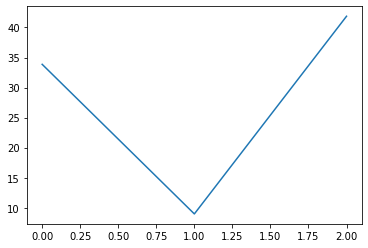

In [41]:
plt.plot((2 * ds.temperature.sel(x=0)).mean("y"))

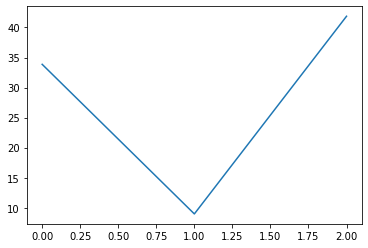

In [42]:
(ds.temperature.sel(x=0).pipe(lambda x: 2 * x).mean("y").pipe(plt.plot))

## Renaming variables

In [43]:
ds.rename({"temperature": "temp", "precipitation": "precip"})

<xarray.Dataset>
Dimensions:             (x: 2, y: 2, time: 3)
Coordinates:
    lat                 (x, y) float64 42.25 42.21 42.63 42.59
    lon                 (x, y) float64 -99.83 -99.32 -99.79 -99.23
  * time                (time) datetime64[ns] 2014-09-06 2014-09-07 2014-09-08
    reference_time      datetime64[ns] 2014-09-05
Dimensions without coordinates: x, y
Data variables:
    temp                (x, y, time) float64 -2.168 0.01942 ... 15.89 17.88
    temperature_double  (x, y, time) float64 -4.337 0.03885 ... 31.78 35.76
    precip              (x, y, time) float64 8.711 9.329 9.035 ... 9.531 7.193

In [44]:
ds.coords["day"] = ("time", [6, 7, 8])
ds.swap_dims({"time": "day"})

<xarray.Dataset>
Dimensions:             (x: 2, y: 2, day: 3)
Coordinates:
    lat                 (x, y) float64 42.25 42.21 42.63 42.59
    lon                 (x, y) float64 -99.83 -99.32 -99.79 -99.23
    time                (day) datetime64[ns] 2014-09-06 2014-09-07 2014-09-08
    reference_time      datetime64[ns] 2014-09-05
  * day                 (day) int32 6 7 8
Dimensions without coordinates: x, y
Data variables:
    temperature         (x, y, day) float64 -2.168 0.01942 27.81 ... 15.89 17.88
    temperature_double  (x, y, day) float64 -4.337 0.03885 55.61 ... 31.78 35.76
    precipitation       (x, y, day) float64 8.711 9.329 9.035 ... 9.531 7.193

## Coordinates

In [45]:
ds.coords

Coordinates:
    lat             (x, y) float64 42.25 42.21 42.63 42.59
    lon             (x, y) float64 -99.83 -99.32 -99.79 -99.23
  * time            (time) datetime64[ns] 2014-09-06 2014-09-07 2014-09-08
    reference_time  datetime64[ns] 2014-09-05
    day             (time) int32 6 7 8

## Modifying coordinates

In [46]:
ds.reset_coords

<bound method Dataset.reset_coords of <xarray.Dataset>
Dimensions:             (x: 2, y: 2, time: 3)
Coordinates:
    lat                 (x, y) float64 42.25 42.21 42.63 42.59
    lon                 (x, y) float64 -99.83 -99.32 -99.79 -99.23
  * time                (time) datetime64[ns] 2014-09-06 2014-09-07 2014-09-08
    reference_time      datetime64[ns] 2014-09-05
    day                 (time) int32 6 7 8
Dimensions without coordinates: x, y
Data variables:
    temperature         (x, y, time) float64 -2.168 0.01942 ... 15.89 17.88
    temperature_double  (x, y, time) float64 -4.337 0.03885 ... 31.78 35.76
    precipitation       (x, y, time) float64 8.711 9.329 9.035 ... 9.531 7.193>

In [47]:
ds.set_coords(["temperature", "precipitation"])

<xarray.Dataset>
Dimensions:             (x: 2, y: 2, time: 3)
Coordinates:
    temperature         (x, y, time) float64 -2.168 0.01942 ... 15.89 17.88
    precipitation       (x, y, time) float64 8.711 9.329 9.035 ... 9.531 7.193
    lat                 (x, y) float64 42.25 42.21 42.63 42.59
    lon                 (x, y) float64 -99.83 -99.32 -99.79 -99.23
  * time                (time) datetime64[ns] 2014-09-06 2014-09-07 2014-09-08
    reference_time      datetime64[ns] 2014-09-05
    day                 (time) int32 6 7 8
Dimensions without coordinates: x, y
Data variables:
    temperature_double  (x, y, time) float64 -4.337 0.03885 ... 31.78 35.76

In [48]:
ds["temperature"].reset_coords(drop=True)

<xarray.DataArray 'temperature' (x: 2, y: 2, time: 3)>
array([[[-2.16842635e+00,  1.94245941e-02,  2.78059182e+01],
        [ 3.60359831e+01,  8.95046963e+00,  1.40647823e+01]],

       [[ 3.54121599e+00,  2.69001956e+01,  2.22105864e+01],
        [ 2.49023914e+01,  1.58921757e+01,  1.78786286e+01]]])
Coordinates:
  * time     (time) datetime64[ns] 2014-09-06 2014-09-07 2014-09-08
Dimensions without coordinates: x, y

## Coordinates methods

In [49]:
ds.coords.to_dataset()

<xarray.Dataset>
Dimensions:         (x: 2, y: 2, time: 3)
Coordinates:
    lat             (x, y) float64 42.25 42.21 42.63 42.59
    lon             (x, y) float64 -99.83 -99.32 -99.79 -99.23
  * time            (time) datetime64[ns] 2014-09-06 2014-09-07 2014-09-08
    reference_time  datetime64[ns] 2014-09-05
    day             (time) int32 6 7 8
Dimensions without coordinates: x, y
Data variables:
    *empty*

In [50]:
alt = xr.Dataset(coords={"z": [10], "lat": 0, "lon": 0})
ds.coords.merge(alt.coords)

<xarray.Dataset>
Dimensions:         (time: 3, z: 1)
Coordinates:
  * time            (time) datetime64[ns] 2014-09-06 2014-09-07 2014-09-08
    reference_time  datetime64[ns] 2014-09-05
    day             (time) int32 6 7 8
  * z               (z) int32 10
Data variables:
    *empty*

## Indexes

In [51]:
ds["time"].to_index()

DatetimeIndex(['2014-09-06', '2014-09-07', '2014-09-08'], dtype='datetime64[ns]', name='time', freq='D')

In [52]:
ds.indexes

time: DatetimeIndex(['2014-09-06', '2014-09-07', '2014-09-08'], dtype='datetime64[ns]', name='time', freq='D')

## MultiIndex coordinates 

In [53]:
midx = pd.MultiIndex.from_arrays(
    [["R", "R", "V", "V"], [0.1, 0.2, 0.7, 0.9]], names=("band", "wn")
)
mda = xr.DataArray(np.random.rand(4), coords={"spec": midx}, dims="spec")
mda

<xarray.DataArray (spec: 4)>
array([0.55037643, 0.21802593, 0.23471076, 0.08536854])
Coordinates:
  * spec     (spec) MultiIndex
  - band     (spec) object 'R' 'R' 'V' 'V'
  - wn       (spec) float64 0.1 0.2 0.7 0.9

In [54]:
mda["band"]

<xarray.DataArray 'band' (spec: 4)>
array(['R', 'R', 'V', 'V'], dtype=object)
Coordinates:
  * spec     (spec) MultiIndex
  - band     (spec) object 'R' 'R' 'V' 'V'
  - wn       (spec) float64 0.1 0.2 0.7 0.9

In [55]:
mda.wn

<xarray.DataArray 'wn' (spec: 4)>
array([0.1, 0.2, 0.7, 0.9])
Coordinates:
  * spec     (spec) MultiIndex
  - band     (spec) object 'R' 'R' 'V' 'V'
  - wn       (spec) float64 0.1 0.2 0.7 0.9